<a href="https://colab.research.google.com/github/pavss/python2/blob/main/EDAvisuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()


Saving titanic.csv to titanic.csv


In [5]:
import pandas as pd

In [8]:
ti = pd.read_csv('titanic.csv')
ti.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


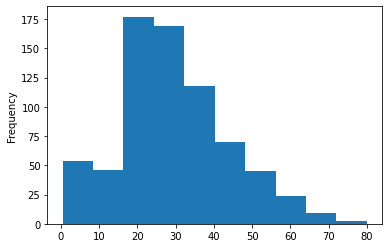

In [9]:
ti['age'].plot(kind='hist');

In [10]:
import seaborn as sns

In [11]:
ti.isna().sum() #check for emptiness

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [12]:
ti = ti.fillna(ti.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [13]:
ti = ti.apply(lambda x:x.fillna(x.value_counts().index[0])) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


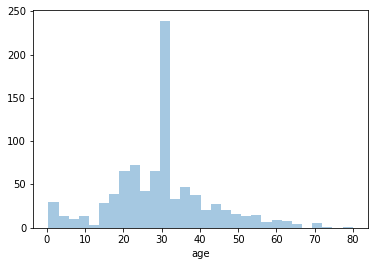

In [14]:
sns.distplot(ti['age'], kde=False);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


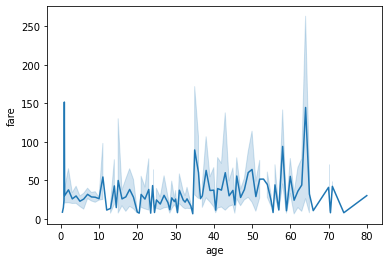

In [15]:
sns.lineplot(ti['age'], ti['fare'])

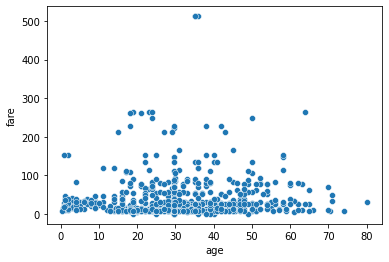

In [16]:
sns.scatterplot(data=ti, x='age', y='fare') #set data to be the dataframe andname the columns

**Exercise** 
Part 1

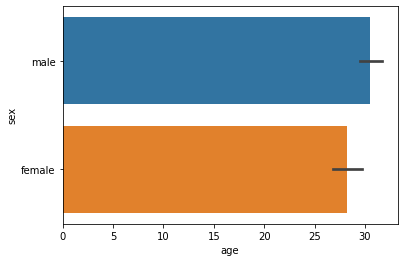

In [49]:
sns.barplot(x='age',y='sex',data=ti)

In [52]:
ti.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


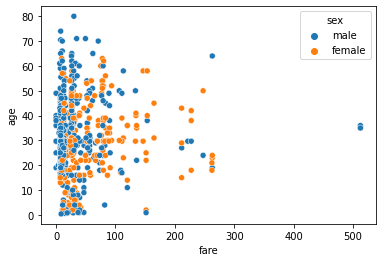

In [53]:
sns.scatterplot(x='fare',y='age',hue='sex',data=ti)

**Exercise** Part 2

In [55]:
sur = ti.groupby('survived').count()
gen = sur['sex']
gen

survived
0    549
1    342
Name: sex, dtype: int64

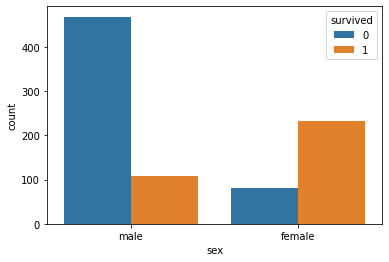

In [57]:
sns.countplot(data = ti, x='sex', hue='survived')

Survival rate is high for females compared to males.

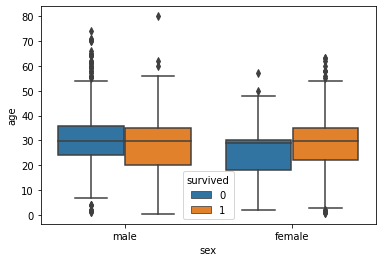

In [58]:
sns.boxplot(data=ti, x="sex", y='age', hue="survived")

Females of age group 20-40 has the higher survival rate.

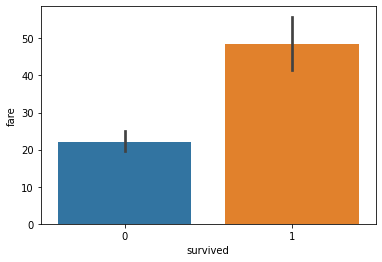

In [60]:
sns.barplot(data = ti, x = 'survived', y='fare')

People with expensive tickets has a higher survival rate compared to people with cheaper tickets.

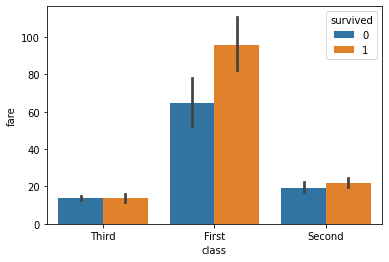

In [61]:
sns.barplot(data=ti, x='class',y='fare',hue='survived')

People in the first class has the highest survival rate and people in second class and third class have an almost equal survival rate.

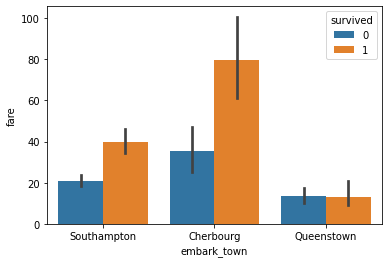

In [62]:
sns.barplot(data = ti, y='fare',x='embark_town',hue='survived')

People who boarde the ship from Cherbourg has higher survival rate compared to people boarded from Southampton and Queenstown.

**Exercise - Univariate plots**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


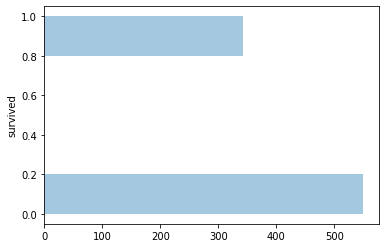

In [17]:
sns.distplot(ti['survived'], vertical = True, kde = False) #create a distribution plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


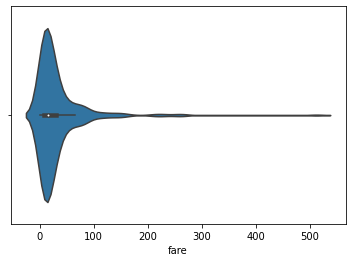

In [31]:
sns.violinplot(ti['fare']) #create a violin plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


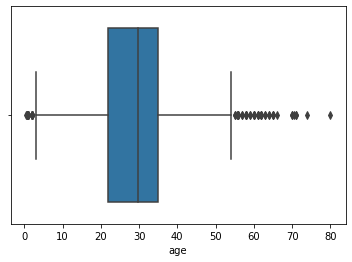

In [19]:
sns.boxplot(ti['age']) #create a box plot

**Multivariate plots**

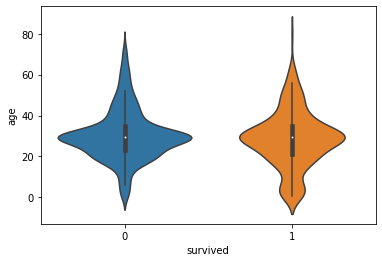

In [20]:
sns.violinplot(data = ti, x='survived', y='age') #create a violin plot for multiple columns

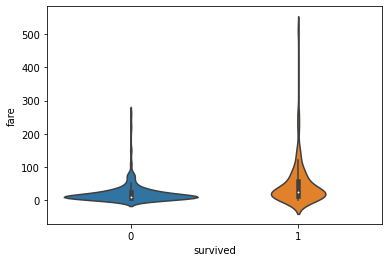

In [33]:
sns.violinplot(data=ti, x="survived", y='fare')

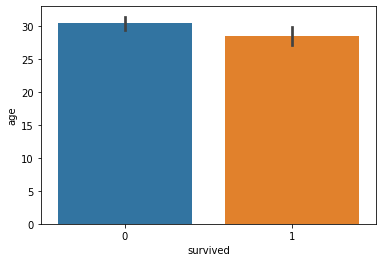

In [24]:
sns.barplot(data=ti, x='survived', y='age') #create barplot

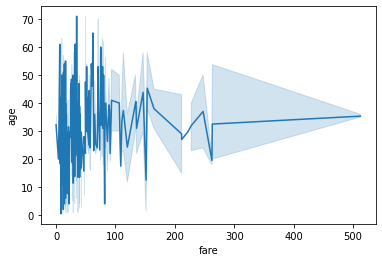

In [25]:
sns.lineplot(data = ti, x='fare', y='age') #create a line plot

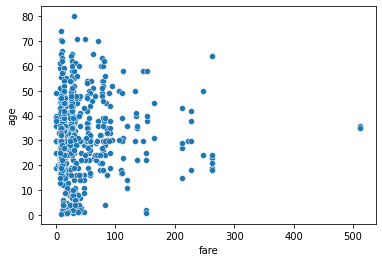

In [26]:
sns.scatterplot(data=ti, x='fare', y='age') #create a scatter plot

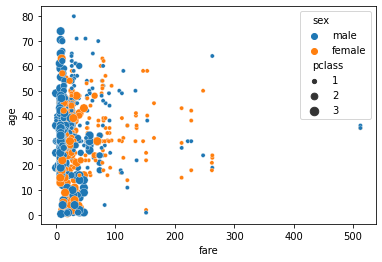

In [30]:
sns.scatterplot(data=ti, x='fare', y='age', 
                hue = 'sex', 
                size = 'pclass');


In [47]:
ti[["age","sex"]].groupby(ti.age>18).sum()

,age
age,
False,1489.670000
True,24972.243824


In [48]:
ti[["age","sex"]].groupby(ti.age<18).sum()

,age
age,
False,25440.243824
True,1021.670000
